In [3]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

### Feature Space causal study

In [21]:
data = pd.read_csv('/Users/davidsegura/git/Leveraging_LLMs_causality/cage_SAD_llm/data/data_turbidity_and_nmr_labels.csv')

In [4]:
data_all = pd.read_csv('/Users/davidsegura/git/Leveraging_LLMs_causality/cage_SAD_llm/data/all_dataset_turbidity.csv')

In [5]:
data_all

Unnamed: 0 di_name tri_name                      di_smiles  \
0             0     Di1     TriA               O=Cc1cccc(C=O)c1   
1             1     Di2     TriA  CC(C)(C)c1cc(C=O)c(O)c(C=O)c1   
2             2     Di3     TriA           O=Cc1cc2sc(C=O)cc2s1   
3             3     Di4     TriA               O=Cc1ccc(C=O)cc1   
4             4     Di5     TriA     O=Cc1c(F)c(F)c(C=O)c(F)c1F   
..          ...     ...      ...                            ...   
343         343    Di30     TriU                        NCCOCCN   
344         344    Di31     TriU              NCC1=CC(CN)=CC=C1   
345         345    Di32     TriU                       NCC(CN)O   
346         346    Di33     TriU            NCCCC[C@H](N)C(=O)O   
347         347    Di34     TriU           N[C@H]1CC[C@H](N)CC1   

                                            tri_smiles turbidity_label  \
0                                      Nc1nc(N)nc(N)n1          turbid   
1                                      Nc1nc(N)nc(N)n1          turbid   
2                                      Nc1nc(N)nc(N)n1          turbid   
3                                      Nc1nc(N)nc(N)n1          turbid   
4                                      Nc1nc(N)nc(N)n1          turbid   
..                                                 ...             ...   
343  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...       dissolved   
344  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...       dissolved   
345  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...       dissolved   
346  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...       dissolved   
347  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...       dissolved   

      turbidity  turbidity_binary  di_charge  di_complexity  ...  \
0     89.389731                 0          0          117.0  ...   
1     95.423764                 0          0          224.0  ...   
2     85.608188                 0          0          185.0  ...   
3    100.885813                 0          0          107.0  ...   
4    104.259992                 0          0          195.0  ...   
..          ...               ...        ...            ...  ...   
343   42.532789                 1          0           28.9  ...   
344   30.918623                 1          0           83.3  ...   
345   47.558380                 1          0           28.0  ...   
346   28.706079                 1          0          106.0  ...   
347   50.140653                 1          0           54.9  ...   

     tri_exact_mass  tri_h_bond_acceptor_count  tri_h_bond_donor_count  \
0        126.065394                        6.0                     3.0   
1        126.065394                        6.0                     3.0   
2        126.065394                        6.0                     3.0   
3        126.065394                        6.0                     3.0   
4        126.065394                        6.0                     3.0   
..              ...                        ...                     ...   
343      468.172545                        3.0                     0.0   
344      468.172545                        3.0                     0.0   
345      468.172545                        3.0                     0.0   
346      468.172545                        3.0                     0.0   
347      468.172545                        3.0                     0.0   

     tri_heavy_atom_count  tri_xlogp  tri_molecular_weight  \
0                     9.0       -1.4                126.12   
1                     9.0       -1.4                126.12   
2                     9.0       -1.4                126.12   
3                     9.0       -1.4                126.12   
4                     9.0       -1.4                126.12   
..                    ...        ...                   ...   
343                  36.0        7.1                468.50   
344                  36.0        7.1                468.50   
345                  36.0        7.1           

In [7]:
def load_and_filter_csv(df):
    
    required_columns = [
        'turbidity_binary', 'di_smiles', 'tri_smiles', 'di_h_bond_donor_count', 'di_arom_group', 'di_complexity',
        'di_xlogp', 'tri_h_bond_donor_count', 'tri_xlogp', 'tri_complexity', 'tri_heavy_atom_count',
        'tri_exact_mass', 'tri_molecular_weight', 'tri_arom_group', 'di_rotatable_bond_count', 'tri_rotatable_bond_count', 
        'di_heavy_atom_count', 'di_molecular_weight', 'di_exact_mass', 'tri_tpsa', 'di_tpsa', 'di_h_bond_acceptor_count',
        'di_defined_atom_stereo_count', 'tri_defined_bond_stereo_count', 'tri_h_bond_acceptor_count'
        ]
    
    available_columns = [col for col in required_columns if col in df.columns]
    
    if not available_columns:
        print("None of the required columns are available in the Excel file.")
        return None

    
    filtered_df = df[available_columns]

    filtered_df.fillna('unknown', inplace=True)

    return filtered_df

In [ ]:
data_cleaned = load_and_filter_csv(data)


In [9]:
data_cleaned_all = load_and_filter_csv(data_all)

/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_35825/1535819998.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna('unknown', inplace=True)


In [10]:
data_cleaned_all.columns

Index(['turbidity_binary', 'di_smiles', 'tri_smiles', 'di_h_bond_donor_count',
       'di_arom_group', 'di_complexity', 'di_xlogp', 'tri_h_bond_donor_count',
       'tri_xlogp', 'tri_complexity', 'tri_heavy_atom_count', 'tri_exact_mass',
       'tri_molecular_weight', 'tri_arom_group', 'di_rotatable_bond_count',
       'tri_rotatable_bond_count', 'di_heavy_atom_count',
       'di_molecular_weight', 'di_exact_mass', 'tri_tpsa', 'di_tpsa',
       'di_h_bond_acceptor_count', 'di_defined_atom_stereo_count',
       'tri_defined_bond_stereo_count', 'tri_h_bond_acceptor_count'],
      dtype='object')

In [11]:
data_cleaned_all

turbidity_binary                      di_smiles  \
0                   0               O=Cc1cccc(C=O)c1   
1                   0  CC(C)(C)c1cc(C=O)c(O)c(C=O)c1   
2                   0           O=Cc1cc2sc(C=O)cc2s1   
3                   0               O=Cc1ccc(C=O)cc1   
4                   0     O=Cc1c(F)c(F)c(C=O)c(F)c1F   
..                ...                            ...   
343                 1                        NCCOCCN   
344                 1              NCC1=CC(CN)=CC=C1   
345                 1                       NCC(CN)O   
346                 1            NCCCC[C@H](N)C(=O)O   
347                 1           N[C@H]1CC[C@H](N)CC1   

                                            tri_smiles  di_h_bond_donor_count  \
0                                      Nc1nc(N)nc(N)n1                      0   
1                                      Nc1nc(N)nc(N)n1                      1   
2                                      Nc1nc(N)nc(N)n1                      0   
3                                      Nc1nc(N)nc(N)n1                      0   
4                                      Nc1nc(N)nc(N)n1                      0   
..                                                 ...                    ...   
343  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...                      2   
344  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...                      2   
345  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...                      3   
346  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...                      3   
347  C1=CC(=CC=C1/C=C/C2=CC(=CC(=C2)/C=C/C3=CC=C(C=...                      2   

     di_arom_group  di_complexity  di_xlogp  tri_h_bond_donor_count  \
0                1          117.0       1.2                     3.0   
1                1          224.0       2.7                     3.0   
2                2          185.0       2.3                     3.0   
3                1          107.0       0.9                     3.0   
4                1          195.0       1.2                     3.0   
..             ...            ...       ...                     ...   
343              0           28.9      -1.8                     0.0   
344              1           83.3      -0.3                     0.0   
345              0           28.0      -2.3                     0.0   
346              0          106.0      -3.0                     0.0   
347              0           54.9      -0.3                     0.0   

     tri_xlogp  tri_complexity  ...  tri_rotatable_bond_count  \
0         -1.4            63.3  ...                       0.0   
1         -1.4            63.3  ...                       0.0   
2         -1.4            63.3  ...                       0.0   
3         -1.4            63.3  ...                       0.0   
4         -1.4            63.3  ...                       0.0   
..         ...             ...  ...                       ...   
343        7.1           654.0  ...                       9.0   
344        7.1           654.0  ...                       9.0   
345        7.1           654.0  ...                       9.0   
346        7.1           654.0  ...                       9.0   
347        7.1           654.0  ...                       9.0   

     di_heavy_atom_count  di_molecular_weight  di_exact_mass  tri_tpsa  \
0                     10               134.13     134.036779     117.0   
1                     15               206.24     206.094294     117.0   
2                     12               196.30     195.965272     117.0   
3                     10               134.13     134.036779     117.0   
4                     14               206.09     205.999092     117.0   
..                   ...                  ...            ...       ...   
343                    7               104.15     104.094963      51.2   
344                   10               136.19     136.100048      51.2   
345                    6                90.12      90.07931

In [123]:
selected_columns = ['di_h_bond_acceptor_count', 'di_h_bond_donor_count', 'di_xlogp', 'di_tpsa', 'tri_h_bond_acceptor_count', 'tri_h_bond_donor_count', 'tri_xlogp', 'tri_tpsa', 'di_nbr_arom', 'tri_nbr_arom',]
data_final = data_cleaned_all[selected_columns]

In [8]:
selected_columns = ['turbidity_label', 'di_h_bond_acceptor_count', 'di_h_bond_donor_count', 'di_xlogp', 'di_tpsa']
data_final = data_cleaned[selected_columns]

In [9]:
data_final = data_cleaned.drop(columns=['di_name', 'tri_name', 'di_smiles', 'di_smiles', 'tri_smiles', 'di_cactvs_fingerprint', 'tri_cactvs_fingerprint', 'di_fingerprint', 'tri_fingerprint'])


In [124]:
data_final

di_h_bond_acceptor_count  di_h_bond_donor_count  di_xlogp  di_tpsa  \
0                         2.0                    0.0       1.2     34.1   
1                         2.0                    0.0       1.2     34.1   
2                         2.0                    0.0       1.2     34.1   
3                         2.0                    0.0       1.2     34.1   
4                         2.0                    0.0       1.2     34.1   
..                        ...                    ...       ...      ...   
350                       2.0                    2.0      -0.4     52.0   
351                       2.0                    2.0      -0.4     52.0   
352                       2.0                    2.0      -0.4     52.0   
353                       2.0                    2.0      -0.4     52.0   
354                       2.0                    2.0      -0.4     52.0   

     tri_h_bond_acceptor_count  tri_h_bond_donor_count  tri_xlogp  tri_tpsa  \
0                          6.0                     3.0       -1.4     117.0   
1                          3.0                     3.0       -0.4      78.1   
2                          4.0                     3.0       -2.6      81.3   
3                          3.0                     3.0        0.9      78.1   
4                          4.0                     3.0       -1.5      81.3   
..                         ...                     ...        ...       ...   
350                        3.0                     0.0        6.4      51.2   
351                        3.0                     0.0        5.2      51.2   
352                        3.0                     0.0        5.2      51.2   
353                        6.0                     0.0        5.2     136.0   
354                        6.0                     0.0        3.5      90.6   

     di_nbr_arom  tri_nbr_arom  
0              1             1  
1              1             1  
2              1             0  
3              1             1  
4              1             0  
..           ...           ...  
350            1             4  
351            1             4  
352            1             4  
353            1             4  
354            1             4  

[355 rows x 10 columns]

In [26]:
data_final['turbidity_label'] = data_final['turbidity_label'].apply(lambda x: 0 if x == 'turbid' else 1)

/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_5882/819141469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['turbidity_label'] = data_final['turbidity_label'].apply(lambda x: 0 if x == 'turbid' else 1)


In [27]:
data_array = data_final.values
column_names = data_final.columns.tolist()

In [13]:
from sklearn.preprocessing import MinMaxScaler
selected_list = ['di_complexity', 'di_xlogp', 'tri_xlogp', 'tri_complexity',
    'tri_exact_mass', 'di_molecular_weight', 'tri_molecular_weight',  'di_exact_mass',
    'tri_tpsa', 'di_tpsa']


scaler = MinMaxScaler()
data_cleaned_all[selected_list] = scaler.fit_transform(data_cleaned_all[selected_list])


/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_35825/1600434587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_all[selected_list] = scaler.fit_transform(data_cleaned_all[selected_list])


In [23]:
data_cleaned_all = data_cleaned_all.drop(['turbidity_binary', 'di_smiles', 'tri_smiles'], axis =1)

In [24]:
data_cleaned_all

di_h_bond_donor_count  di_arom_group  di_complexity  di_xlogp  \
0                        0              1       0.320809  0.608696   
1                        1              1       0.630058  0.826087   
2                        0              2       0.517341  0.768116   
3                        0              1       0.291908  0.565217   
4                        0              1       0.546243  0.608696   
..                     ...            ...            ...       ...   
343                      2              0       0.066185  0.173913   
344                      2              1       0.223410  0.391304   
345                      3              0       0.063584  0.101449   
346                      3              0       0.289017  0.000000   
347                      2              0       0.141329  0.391304   

     tri_h_bond_donor_count  tri_xlogp  tri_complexity  tri_heavy_atom_count  \
0                       3.0   0.123711        0.014090                   9.0   
1                       3.0   0.123711        0.014090                   9.0   
2                       3.0   0.123711        0.014090                   9.0   
3                       3.0   0.123711        0.014090                   9.0   
4                       3.0   0.123711        0.014090                   9.0   
..                      ...        ...             ...                   ...   
343                     0.0   1.000000        0.784736                  36.0   
344                     0.0   1.000000        0.784736                  36.0   
345                     0.0   1.000000        0.784736                  36.0   
346                     0.0   1.000000        0.784736                  36.0   
347                     0.0   1.000000        0.784736                  36.0   

     tri_exact_mass  tri_molecular_weight  ...  tri_rotatable_bond_count  \
0          0.000000              0.000000  ...                       0.0   
1          0.000000              0.000000  ...                       0.0   
2          0.000000              0.000000  ...                       0.0   
3          0.000000              0.000000  ...                       0.0   
4          0.000000              0.000000  ...                       0.0   
..              ...                   ...  ...                       ...   
343        0.966154              0.966138  ...                       9.0   
344        0.966154              0.966138  ...                       9.0   
345        0.966154              0.966138  ...                       9.0   
346        0.966154              0.966138  ...                       9.0   
347        0.966154              0.966138  ...                       9.0   

     di_heavy_atom_count  di_molecular_weight  di_exact_mass  tri_tpsa  \
0                     10             0.273982       0.273913  0.775943   
1                     15             0.540859       0.540752  0.775943   
2                     12             0.504071       0.503243  0.775943   
3                     10             0.273982       0.273913  0.775943   
4                     14             0.540303       0.540400  0.775943   
..                   ...                  ...            ...       ...   
343                    7             0.163027       0.163035  0.000000   
344                   10             0.281606       0.281554  0.000000   
345                    6             0.111103       0.111133  0.000000   
346                   10             0.318616       0.318606  0.000000   
347                    8             0.200185       0.200143  0.000000   

      di_tpsa  di_h_bond_acceptor_count  di_defined_atom_stereo_count  \
0    0.000000                         2                             0   
1    0.356766                         3                             0   
2    0.992970                         4                             0   
3    0.000000                         2                             0   
4    0.000000                       

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci


Min max standardization

In [65]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

exclude_columns = ['di_h_bond_acceptor_count', 'tri_h_bond_acceptor_count', 'di_h_bond_donor_count', 'tri_h_bond_donor_count', 'di_nbr_arom',	'tri_nbr_arom']  

data_to_normalize = data_final.drop(columns=exclude_columns)
data_excluded = data_final[exclude_columns]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

final_df = pd.concat([normalized_df, data_excluded], axis=1)

final_df = final_df[data_final.columns]

normalized_df = pd.DataFrame(final_df)


In [66]:
normalized_df

di_h_bond_acceptor_count  di_h_bond_donor_count  di_xlogp   di_tpsa  \
0                         2.0                    0.0  0.608696  0.000000   
1                         2.0                    0.0  0.608696  0.000000   
2                         2.0                    0.0  0.608696  0.000000   
3                         2.0                    0.0  0.608696  0.000000   
4                         2.0                    0.0  0.608696  0.000000   
..                        ...                    ...       ...       ...   
350                       2.0                    2.0  0.376812  0.314587   
351                       2.0                    2.0  0.376812  0.314587   
352                       2.0                    2.0  0.376812  0.314587   
353                       2.0                    2.0  0.376812  0.314587   
354                       2.0                    2.0  0.376812  0.314587   

     tri_h_bond_acceptor_count  tri_h_bond_donor_count  tri_xlogp  tri_tpsa  \
0                          6.0                     3.0   0.123711  0.775943   
1                          3.0                     3.0   0.226804  0.317217   
2                          4.0                     3.0   0.000000  0.354953   
3                          3.0                     3.0   0.360825  0.317217   
4                          4.0                     3.0   0.113402  0.354953   
..                         ...                     ...        ...       ...   
350                        3.0                     0.0   0.927835  0.000000   
351                        3.0                     0.0   0.804124  0.000000   
352                        3.0                     0.0   0.804124  0.000000   
353                        6.0                     0.0   0.804124  1.000000   
354                        6.0                     0.0   0.628866  0.464623   

     di_nbr_arom  tri_nbr_arom  
0              1             1  
1              1             1  
2              1             0  
3              1             1  
4              1             0  
..           ...           ...  
350            1             4  
351            1             4  
352            1             4  
353            1             4  
354            1             4  

[355 rows x 10 columns]

In [58]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_final)
normalized_df = pd.DataFrame(normalized_data, columns=data_final.columns)


Z-score standardization

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_final)
standardized_df = pd.DataFrame(standardized_data, columns=data_final.columns)


In [60]:
data_final

di_h_bond_acceptor_count  di_h_bond_donor_count  di_xlogp  di_tpsa  \
0                         2.0                    0.0       1.2     34.1   
1                         2.0                    0.0       1.2     34.1   
2                         2.0                    0.0       1.2     34.1   
3                         2.0                    0.0       1.2     34.1   
4                         2.0                    0.0       1.2     34.1   
..                        ...                    ...       ...      ...   
350                       2.0                    2.0      -0.4     52.0   
351                       2.0                    2.0      -0.4     52.0   
352                       2.0                    2.0      -0.4     52.0   
353                       2.0                    2.0      -0.4     52.0   
354                       2.0                    2.0      -0.4     52.0   

     tri_h_bond_acceptor_count  tri_h_bond_donor_count  tri_xlogp  tri_tpsa  \
0                          6.0                     3.0       -1.4     117.0   
1                          3.0                     3.0       -0.4      78.1   
2                          4.0                     3.0       -2.6      81.3   
3                          3.0                     3.0        0.9      78.1   
4                          4.0                     3.0       -1.5      81.3   
..                         ...                     ...        ...       ...   
350                        3.0                     0.0        6.4      51.2   
351                        3.0                     0.0        5.2      51.2   
352                        3.0                     0.0        5.2      51.2   
353                        6.0                     0.0        5.2     136.0   
354                        6.0                     0.0        3.5      90.6   

     di_nbr_arom  tri_nbr_arom  
0              1             1  
1              1             1  
2              1             0  
3              1             1  
4              1             0  
..           ...           ...  
350            1             4  
351            1             4  
352            1             4  
353            1             4  
354            1             4  

[355 rows x 10 columns]

In [59]:
normalized_df

di_h_bond_acceptor_count  di_h_bond_donor_count  di_xlogp   di_tpsa  \
0                         0.0               0.000000  0.608696  0.000000   
1                         0.0               0.000000  0.608696  0.000000   
2                         0.0               0.000000  0.608696  0.000000   
3                         0.0               0.000000  0.608696  0.000000   
4                         0.0               0.000000  0.608696  0.000000   
..                        ...                    ...       ...       ...   
350                       0.0               0.666667  0.376812  0.314587   
351                       0.0               0.666667  0.376812  0.314587   
352                       0.0               0.666667  0.376812  0.314587   
353                       0.0               0.666667  0.376812  0.314587   
354                       0.0               0.666667  0.376812  0.314587   

     tri_h_bond_acceptor_count  tri_h_bond_donor_count  tri_xlogp  tri_tpsa  \
0                     1.000000                     1.0   0.123711  0.775943   
1                     0.000000                     1.0   0.226804  0.317217   
2                     0.333333                     1.0   0.000000  0.354953   
3                     0.000000                     1.0   0.360825  0.317217   
4                     0.333333                     1.0   0.113402  0.354953   
..                         ...                     ...        ...       ...   
350                   0.000000                     0.0   0.927835  0.000000   
351                   0.000000                     0.0   0.804124  0.000000   
352                   0.000000                     0.0   0.804124  0.000000   
353                   1.000000                     0.0   0.804124  1.000000   
354                   1.000000                     0.0   0.628866  0.464623   

     di_nbr_arom  tri_nbr_arom  
0       0.333333          0.25  
1       0.333333          0.25  
2       0.333333          0.00  
3       0.333333          0.25  
4       0.333333          0.00  
..           ...           ...  
350     0.333333          1.00  
351     0.333333          1.00  
352     0.333333          1.00  
353     0.333333          1.00  
354     0.333333          1.00  

[355 rows x 10 columns]

In [67]:
data_array = normalized_df.values
column_names = normalized_df.columns.tolist()

In [25]:
data_array = data_cleaned_all.values
column_names = data_cleaned_all.columns.tolist()

# PC (Peter-Clark)

In [26]:
data_array

array([[0.        , 1.        , 0.32080925, ..., 0.        , 0.        ,
        6.        ],
       [1.        , 1.        , 0.6300578 , ..., 0.        , 0.        ,
        6.        ],
       [0.        , 2.        , 0.51734104, ..., 0.        , 0.        ,
        6.        ],
       ...,
       [3.        , 0.        , 0.06358382, ..., 0.        , 3.        ,
        3.        ],
       [3.        , 0.        , 0.28901734, ..., 1.        , 3.        ,
        3.        ],
       [2.        , 0.        , 0.14132948, ..., 0.        , 3.        ,
        3.        ]])

In [27]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1957.58it/s]


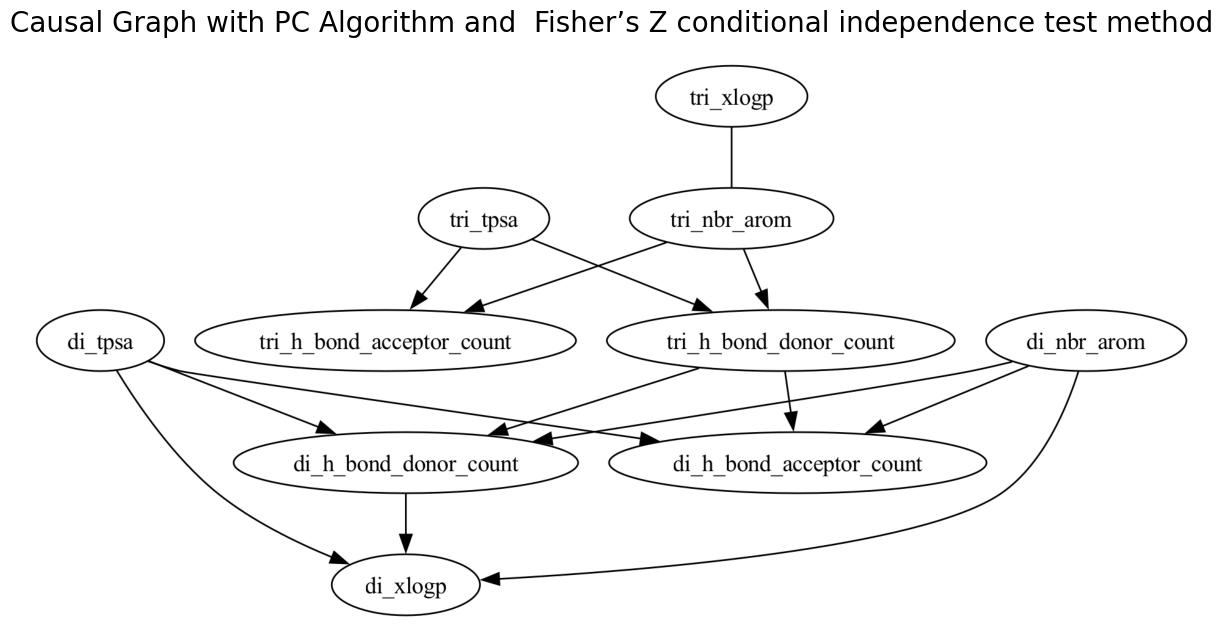

In [70]:
alpha = 0.05  
indep_test = 'fisherz'  

cg = pc(data_array, alpha=alpha, indep_test=indep_test, stable=True, verbose=False)

pyd_graph = GraphUtils.to_pydot(cg.G, labels=column_names)

pyd_graph.write_png("causal_graph_with_labels.png")

from PIL import Image
img = Image.open("causal_graph_with_labels.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with PC Algorithm and  Fisher’s Z conditional independence test method", fontsize=20, pad=20)
plt.show()

 

  0%|          | 0/22 [00:00<?, ?it/s]

0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000000

0 dep 4 | () with p-value 0.000000

0 dep 5 | () with p-value 0.000000

0 dep 6 | () with p-value 0.000000

0 dep 7 | () with p-value 0.000000

0 dep 8 | () with p-value 0.000000

0 dep 9 | () with p-value 0.000000

0 dep 10 | () with p-value 0.000000

0 dep 11 | () with p-value 0.000000

0 dep 12 | () with p-value 0.000000

0 dep 13 | () with p-value 0.000000

0 dep 14 | () with p-value 0.000000

0 dep 15 | () with p-value 0.000000

0 dep 16 | () with p-value 0.000000

0 dep 17 | () with p-value 0.000000

0 dep 18 | () with p-value 0.000000

0 dep 19 | () with p-value 0.000000

0 ind 20 | () with p-value 0.064883

0 dep 21 | () with p-value 0.001697

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.000000

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () wit

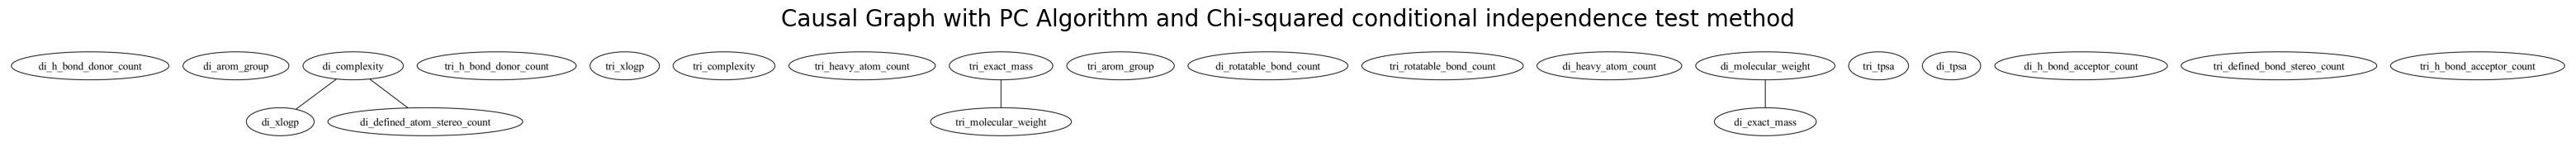

In [30]:
alpha = 0.05  
indep_test = 'chisq' 

cg = pc(data_array, alpha=alpha, indep_test=indep_test, stable=True, verbose=True)

pyd_graph = GraphUtils.to_pydot(cg.G, labels=column_names)

pyd_graph.write_png("causal_graph_with_labels.png")

from PIL import Image
img = Image.open("causal_graph_with_labels.png")
plt.figure(figsize=(40, 30))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with PC Algorithm and Chi-squared conditional independence test method", fontsize=20, pad=20)
plt.show()

 

  0%|          | 0/22 [00:00<?, ?it/s]

0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000000

0 dep 4 | () with p-value 0.000000

0 dep 5 | () with p-value 0.000000

0 dep 6 | () with p-value 0.000000

0 dep 7 | () with p-value 0.000000

0 dep 8 | () with p-value 0.000000

0 dep 9 | () with p-value 0.000000

0 dep 10 | () with p-value 0.000000

0 dep 11 | () with p-value 0.000000

0 dep 12 | () with p-value 0.000000

0 dep 13 | () with p-value 0.000000

0 dep 14 | () with p-value 0.000000

0 dep 15 | () with p-value 0.000000

0 dep 16 | () with p-value 0.000000

0 dep 17 | () with p-value 0.000000

0 dep 18 | () with p-value 0.000000

0 dep 19 | () with p-value 0.000000

0 dep 20 | () with p-value 0.007418

0 dep 21 | () with p-value 0.001850

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.000000

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () wit

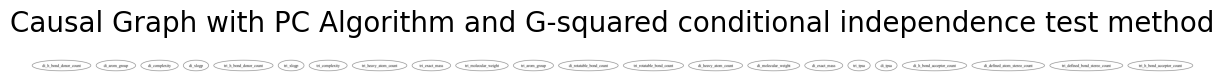

In [31]:
alpha = 0.05 
indep_test = 'gsq' 


cg = pc(data_array, alpha=alpha, indep_test=indep_test, stable=True, verbose=True)

pyd_graph = GraphUtils.to_pydot(cg.G, labels=column_names)

pyd_graph.write_png("causal_graph_with_labels.png")

from PIL import Image
img = Image.open("causal_graph_with_labels.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with PC Algorithm and G-squared conditional independence test method", fontsize=20, pad=20)
plt.show()

 

# FCI

  0%|          | 0/22 [00:00<?, ?it/s]

0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000000

0 dep 4 | () with p-value 0.000000

0 dep 5 | () with p-value 0.000000

0 dep 6 | () with p-value 0.000000

0 dep 7 | () with p-value 0.000000

0 dep 8 | () with p-value 0.000000

0 dep 9 | () with p-value 0.000000

0 dep 10 | () with p-value 0.000000

0 ind 11 | () with p-value 0.681844

0 dep 12 | () with p-value 0.000000

0 dep 13 | () with p-value 0.000000

0 dep 14 | () with p-value 0.000000

0 dep 15 | () with p-value 0.000000

0 dep 16 | () with p-value 0.000001

0 dep 17 | () with p-value 0.000000

0 dep 18 | () with p-value 0.000634

0 dep 19 | () with p-value 0.000001

0 dep 20 | () with p-value 0.011338

0 dep 21 | () with p-value 0.022200

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.000000

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () wit

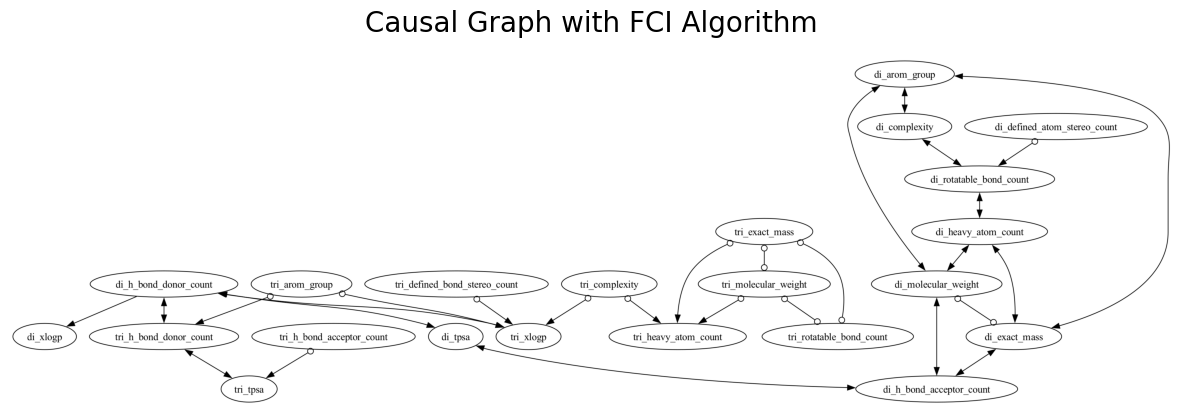

In [32]:
import numpy as np
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

g, edges = fci(data_array, independence_test_method="fisherz", alpha=0.05, depth=-1, verbose=True)

pdy = GraphUtils.to_pydot(g, labels=column_names)

pdy.write_png('fci_causal_graph_with_labels.png')

img = Image.open('fci_causal_graph_with_labels.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis("off")
 plt.title("Causal Graph with FCI Algorithm", fontsize=20, pad=20)
plt.show()


Depth=0, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 720.67it/s]


0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000000

0 ind 4 | () with p-value 0.733031

0 dep 5 | () with p-value 0.000000

0 ind 6 | () with p-value 0.141400

0 dep 7 | () with p-value 0.000582

0 dep 8 | () with p-value 0.000000

0 dep 9 | () with p-value 0.000060

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.023659

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () with p-value 0.000000

1 dep 8 | () with p-value 0.000000

1 dep 9 | () with p-value 0.000000

2 dep 0 | () with p-value 0.000000

2 dep 1 | () with p-value 0.000000

2 dep 3 | () with p-value 0.000000

2 ind 4 | () with p-value 0.999024

2 dep 5 | () with p-value 0.000000

2 dep 6 | () with p-value 0.011215

2 dep 7 | () with p-value 0.000000

2 dep 8 | () with p-value 0.000000

2 dep 9 | () with p-value 0.000000

3 dep 0 | () with p-value 0.

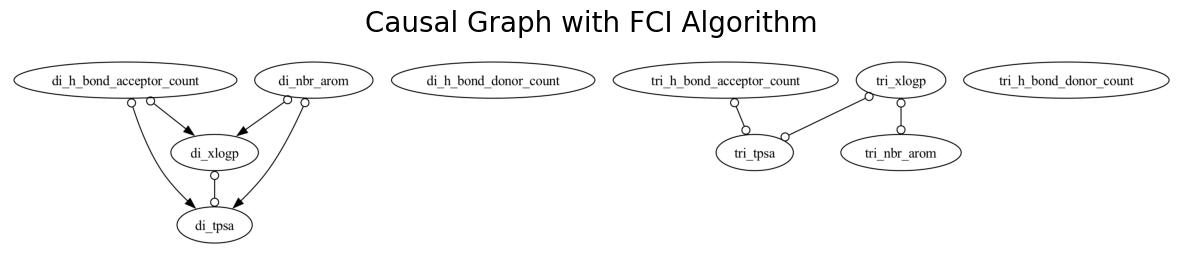

In [74]:
import numpy as np
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

g, edges = fci(data_array, independence_test_method="chisq", alpha=0.05, depth=-1, verbose=True)

pdy = GraphUtils.to_pydot(g, labels=column_names)

pdy.write_png('fci_causal_graph_with_labels.png')

img = Image.open('fci_causal_graph_with_labels.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with FCI Algorithm", fontsize=20, pad=20)
plt.show()


Depth=0, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 713.63it/s]


0 dep 1 | () with p-value 0.000000

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000000

0 ind 4 | () with p-value 0.705006

0 dep 5 | () with p-value 0.000000

0 ind 6 | () with p-value 0.090206

0 dep 7 | () with p-value 0.000285

0 dep 8 | () with p-value 0.000000

0 dep 9 | () with p-value 0.000021

1 dep 0 | () with p-value 0.000000

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.018854

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () with p-value 0.000000

1 dep 8 | () with p-value 0.000000

1 dep 9 | () with p-value 0.000000

2 dep 0 | () with p-value 0.000000

2 dep 1 | () with p-value 0.000000

2 dep 3 | () with p-value 0.000000

2 ind 4 | () with p-value 0.998308

2 dep 5 | () with p-value 0.000000

2 dep 6 | () with p-value 0.000031

2 dep 7 | () with p-value 0.000000

2 dep 8 | () with p-value 0.000000

2 dep 9 | () with p-value 0.000000

3 dep 0 | () with p-value 0.

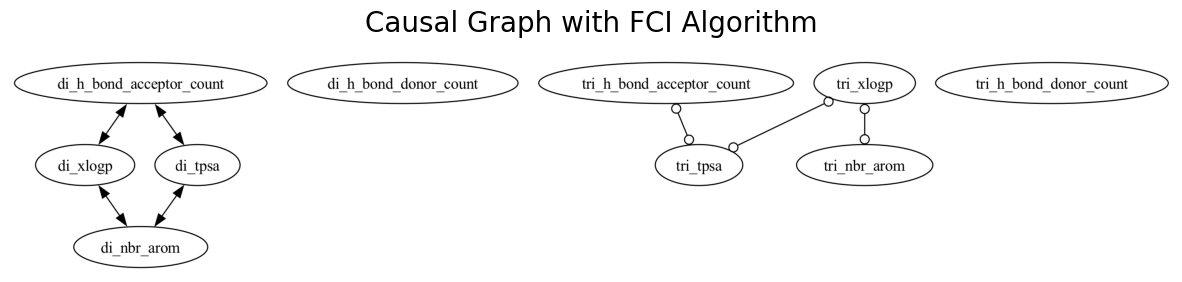

In [75]:
import numpy as np
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils

g, edges = fci(data_array, independence_test_method="gsq", alpha=0.05, depth=-1, verbose=True)

pdy = GraphUtils.to_pydot(g, labels=column_names)

pdy.write_png('fci_causal_graph_with_labels.png')

img = Image.open('fci_causal_graph_with_labels.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with FCI Algorithm", fontsize=20, pad=20)
plt.show()


### ICALINGAM

In [76]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(None, 2000)
model.fit(data_array)

print(model.causal_order_)
print(model.adjacency_matrix_)

[np.int64(3), np.int64(7), np.int64(6), np.int64(2), np.int64(1), np.int64(5), np.int64(4), np.int64(8), np.int64(9), np.int64(0)]
[[ 0.         -0.54728625  0.          3.34169155  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         -2.16596001  0.57192974  0.          0.
   1.37740947  0.          0.          0.        ]
 [ 0.          0.          0.         -0.26758889  0.          0.
  -0.32474664  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.08993128  0.          0.          0.         -0.38568316
   0.          4.79509424  0.          0.        ]
 [ 0.         -0.71394118  0.          0.21887518  0.          0.
  -1.87520475  0.96019778  0.          0.        ]
 [ 0.          0.          0.          0.20443537  0.          0.
   0.         -0.33429267  0.          0.        ]
 [ 0.          0.          0.          0. 

In [77]:
column_names

['di_h_bond_acceptor_count',
 'di_h_bond_donor_count',
 'di_xlogp',
 'di_tpsa',
 'tri_h_bond_acceptor_count',
 'tri_h_bond_donor_count',
 'tri_xlogp',
 'tri_tpsa',
 'di_nbr_arom',
 'tri_nbr_arom']

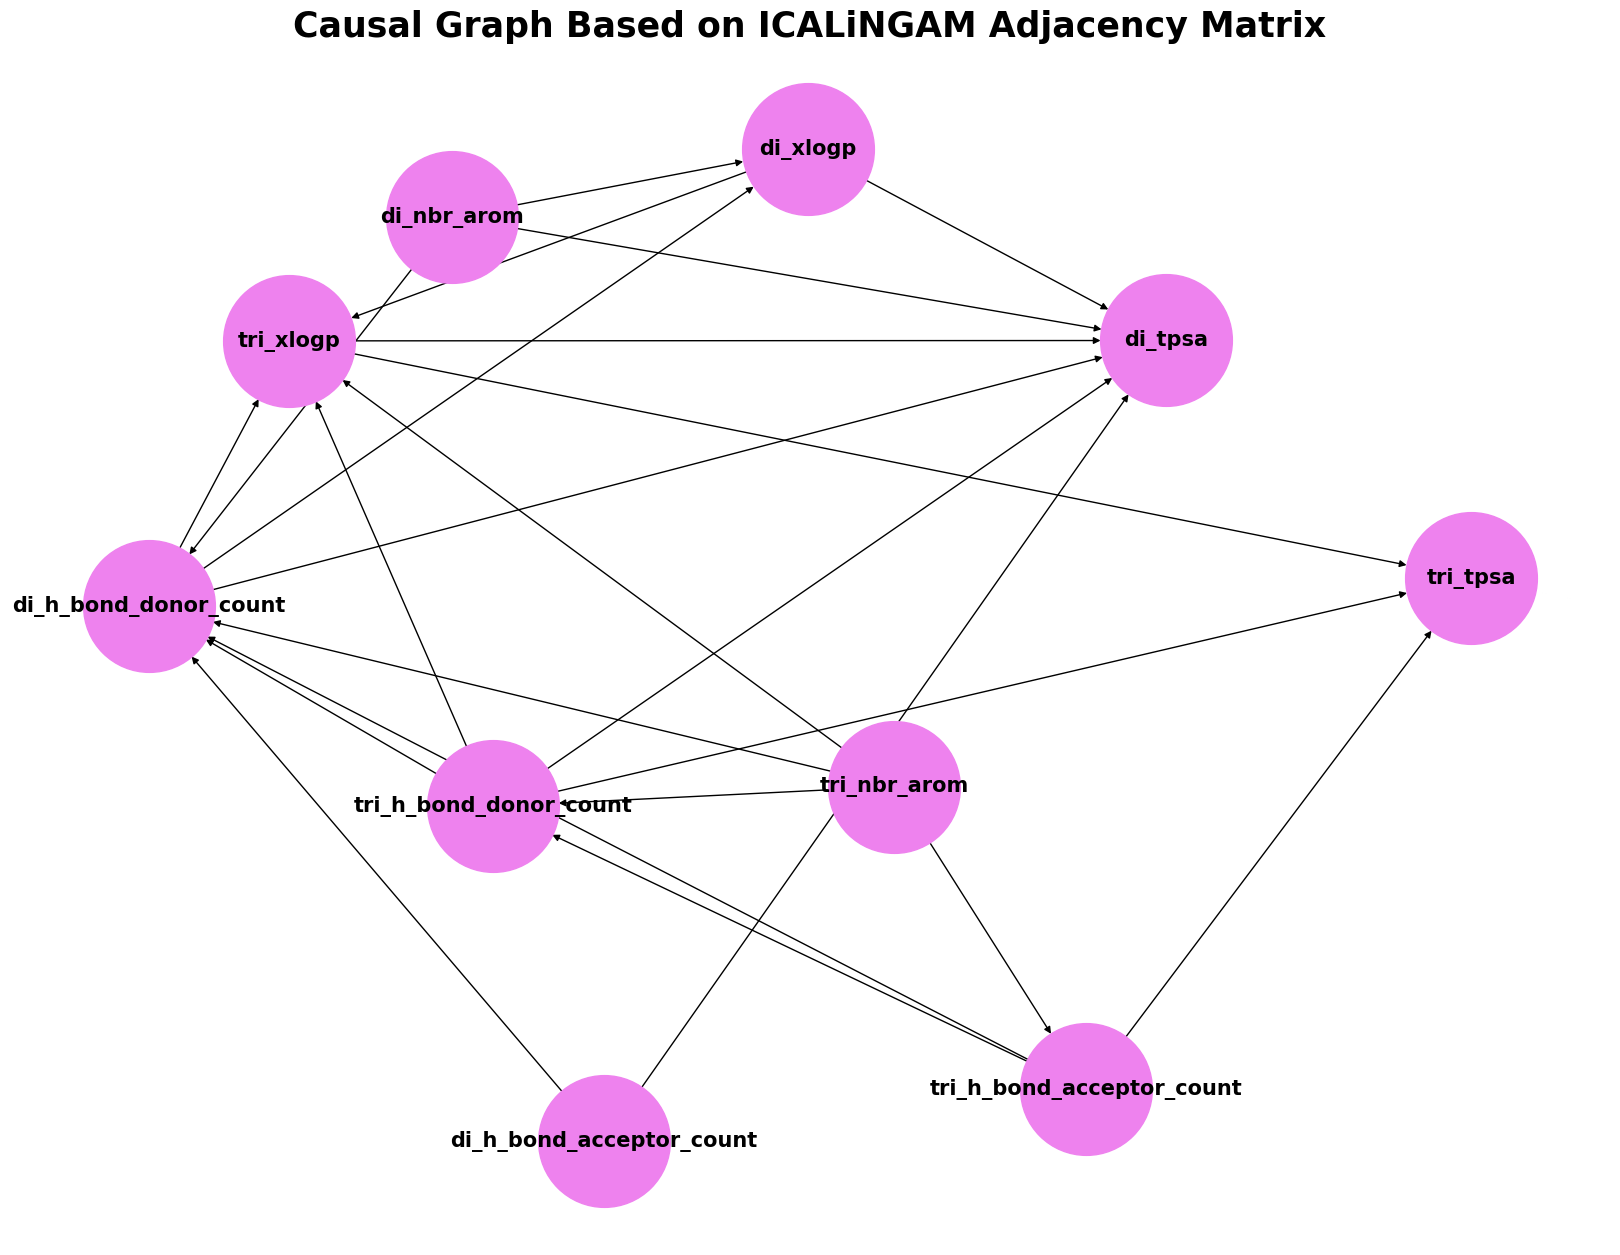

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

feature_names = column_names

adjacency_matrix = model.adjacency_matrix_

G = nx.DiGraph()

num_features = adjacency_matrix.shape[0]
for i in range(num_features):
    G.add_node(i, label=feature_names[i])  

for i in range(num_features):
    for j in range(num_features):
        if adjacency_matrix[i, j] != 0:  
            G.add_edge(i, j)


pos = nx.spring_layout(G, seed=50, k = 2)

labels = {i: feature_names[i] for i in range(num_features)} 
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=9000, node_color="violet", font_size=15, font_weight="bold", arrows=True)
plt.title("Causal Graph Based on ICALiNGAM Adjacency Matrix", size = 25, weight="bold")
plt.show()


## Actually bad bcs the label is binary and linear approaches like LinGRAM are not adapted

# GES

In [ ]:
import numpy as np
import pandas as pd
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io
from PIL import Image




AttributeError: `np.mat` was removed in the NumPy 2.0 release. Use `np.asmatrix` instead.

In [ ]:
Record = ges(data_array, score_func="local_score_BIC")

NameError: name 'ges' is not defined

In [ ]:
pyd = GraphUtils.to_pydot(Record['G'], labels=column_names)


pyd.set_label("Causal Graph with GES and BIC Score")
pyd.set_labelloc("top") 
pyd.set_dpi(300)  

pyd.write_png("causal_graph_with_labels.png")

img = Image.open("causal_graph_with_labels.png")
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with GES and BIC Score", fontsize=20)
plt.show()


# PC on all features

In [96]:
data_cleaned = load_and_filter_csv(data_all)


/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_5882/2267171210.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna('unknown', inplace=True)


In [97]:
data_cleaned.columns

Index(['di_name', 'tri_name', 'turbidity_label', 'di_smiles', 'tri_smiles',
       'di_cactvs_fingerprint', 'di_fingerprint', 'di_charge', 'di_complexity',
       'di_covalent_unit_count', 'di_defined_atom_stereo_count',
       'di_defined_bond_stereo_count', 'di_exact_mass',
       'di_h_bond_acceptor_count', 'di_h_bond_donor_count',
       'di_heavy_atom_count', 'di_xlogp', 'di_molecular_weight',
       'di_rotatable_bond_count', 'di_tpsa', 'tri_cactvs_fingerprint',
       'tri_fingerprint', 'tri_charge', 'tri_complexity',
       'tri_covalent_unit_count', 'tri_defined_atom_stereo_count',
       'tri_defined_bond_stereo_count', 'tri_exact_mass',
       'tri_h_bond_acceptor_count', 'tri_h_bond_donor_count',
       'tri_heavy_atom_count', 'tri_xlogp', 'tri_molecular_weight',
       'tri_rotatable_bond_count', 'tri_tpsa', 'di_nbr_arom', 'tri_nbr_arom'],
      dtype='object')

In [98]:
data_final_all = data_cleaned.drop(columns=['di_name', 'tri_name', 'di_smiles', 'di_smiles', 'tri_smiles', 'di_cactvs_fingerprint', 'tri_cactvs_fingerprint', 'di_fingerprint', 'tri_fingerprint'])


In [99]:
data_final_all = data_final_all.drop(columns=['turbidity_label'])


In [108]:
data_final_all

di_charge  di_complexity  di_covalent_unit_count  \
0          0.0          117.0                     1.0   
1          0.0          117.0                     1.0   
2          0.0          117.0                     1.0   
3          0.0          117.0                     1.0   
4          0.0          117.0                     1.0   
..         ...            ...                     ...   
350        0.0           73.3                     1.0   
351        0.0           73.3                     1.0   
352        0.0           73.3                     1.0   
353        0.0           73.3                     1.0   
354        0.0           73.3                     1.0   

     di_defined_atom_stereo_count  di_defined_bond_stereo_count  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           0.0   
3                             0.0                           0.0   
4                             0.0                           0.0   
..                            ...                           ...   
350                           0.0                           0.0   
351                           0.0                           0.0   
352                           0.0                           0.0   
353                           0.0                           0.0   
354                           0.0                           0.0   

     di_exact_mass  di_h_bond_acceptor_count  di_h_bond_donor_count  \
0       134.036779                       2.0                    0.0   
1       134.036779                       2.0                    0.0   
2       134.036779                       2.0                    0.0   
3       134.036779                       2.0                    0.0   
4       134.036779                       2.0                    0.0   
..             ...                       ...                    ...   
350     136.100048                       2.0                    2.0   
351     136.100048                       2.0                    2.0   
352     136.100048                       2.0                    2.0   
353     136.100048                       2.0                    2.0   
354     136.100048                       2.0                    2.0   

     di_heavy_atom_count  di_xlogp  ...  tri_exact_mass  \
0                   10.0       1.2  ...      126.065394   
1                   10.0       1.2  ...      207.173548   
2                   10.0       1.2  ...      146.153147   
3                   10.0       1.2  ...      249.220498   
4                   10.0       1.2  ...      188.200097   
..                   ...       ...  ...             ...   
350                 10.0      -0.4  ...      462.125594   
351                 10.0      -0.4  ...      390.125594   
352                 10.0      -0.4  ...      390.125594   
353                 10.0      -0.4  ...      407.994858   
354                 10.0      -0.4  ...      360.063388   

     tri_h_bond_acceptor_count  tri_h_bond_donor_count  tri_heavy_atom_count  \
0                          6.0                     3.0                   9.0   
1                          3.0                     3.0                  15.0   
2                          4.0                     3.0                  10.0   
3                          3.0                     3.0                  18.0   
4                          4.0                     3.0                  13.0   
..                         ...                     ...                   ...   
350                        3.0                     0.0                  36.0   
351                        3.0                     0.0                  30.0   
352                        3.0                     0.0                  30.0   
353                        6.0                     0.0                  27.0   
354                        6.0                     0.0                  2

In [102]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

exclude_columns = ['di_h_bond_acceptor_count', 'tri_h_bond_acceptor_count', 'di_h_bond_donor_count', 'tri_h_bond_donor_count', 'di_nbr_arom',	'tri_nbr_arom']  

data_to_normalize = data_final_all.drop(columns=exclude_columns)
data_excluded = data_final_all[exclude_columns]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=data_to_normalize.columns)

final_df = pd.concat([normalized_df, data_excluded], axis=1)

final_df = final_df[data_final_all.columns]

normalized_df = pd.DataFrame(final_df)

In [104]:
data_array_all = normalized_df.values
column_names_all = normalized_df.columns.tolist()

Depth=1, working on node 27: 100%|██████████| 28/28 [00:00<00:00, 46.27it/s] 


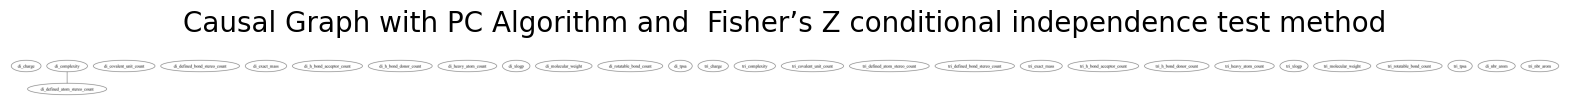

In [105]:
alpha = 0.05 
indep_test = 'gsq' 

cg = pc(data_array_all, alpha=alpha, indep_test=indep_test, stable=True, verbose=False)

pyd_graph = GraphUtils.to_pydot(cg.G, labels=column_names_all)

pyd_graph.write_png("causal_graph_with_labels.png")

from PIL import Image
img = Image.open("causal_graph_with_labels.png")
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis("off")
plt.title("Causal Graph with PC Algorithm and  Fisher’s Z conditional independence test method", fontsize=20, pad=20)
plt.show()

 

# LINGRAM on al features

In [106]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(None, 2000)
model.fit(data_array_all)

print(model.causal_order_)
print(model.adjacency_matrix_)

[np.int64(2), np.int64(0), np.int64(4), np.int64(13), np.int64(15), np.int64(16), np.int64(5), np.int64(18), np.int64(23), np.int64(10), np.int64(8), np.int64(21), np.int64(1), np.int64(3), np.int64(9), np.int64(12), np.int64(25), np.int64(14), np.int64(22), np.int64(11), np.int64(17), np.int64(20), np.int64(24), np.int64(6), np.int64(19), np.int64(26), np.int64(27), np.int64(7)]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.14912888e+02  0.00000000e+00  0.00000000e+00
   1.81500469e+00  0.0

/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/Users/davidsegura/miniconda3/envs/env_cage/lib/python3.9/site-packages/sklearn/linear_model/_least_ang

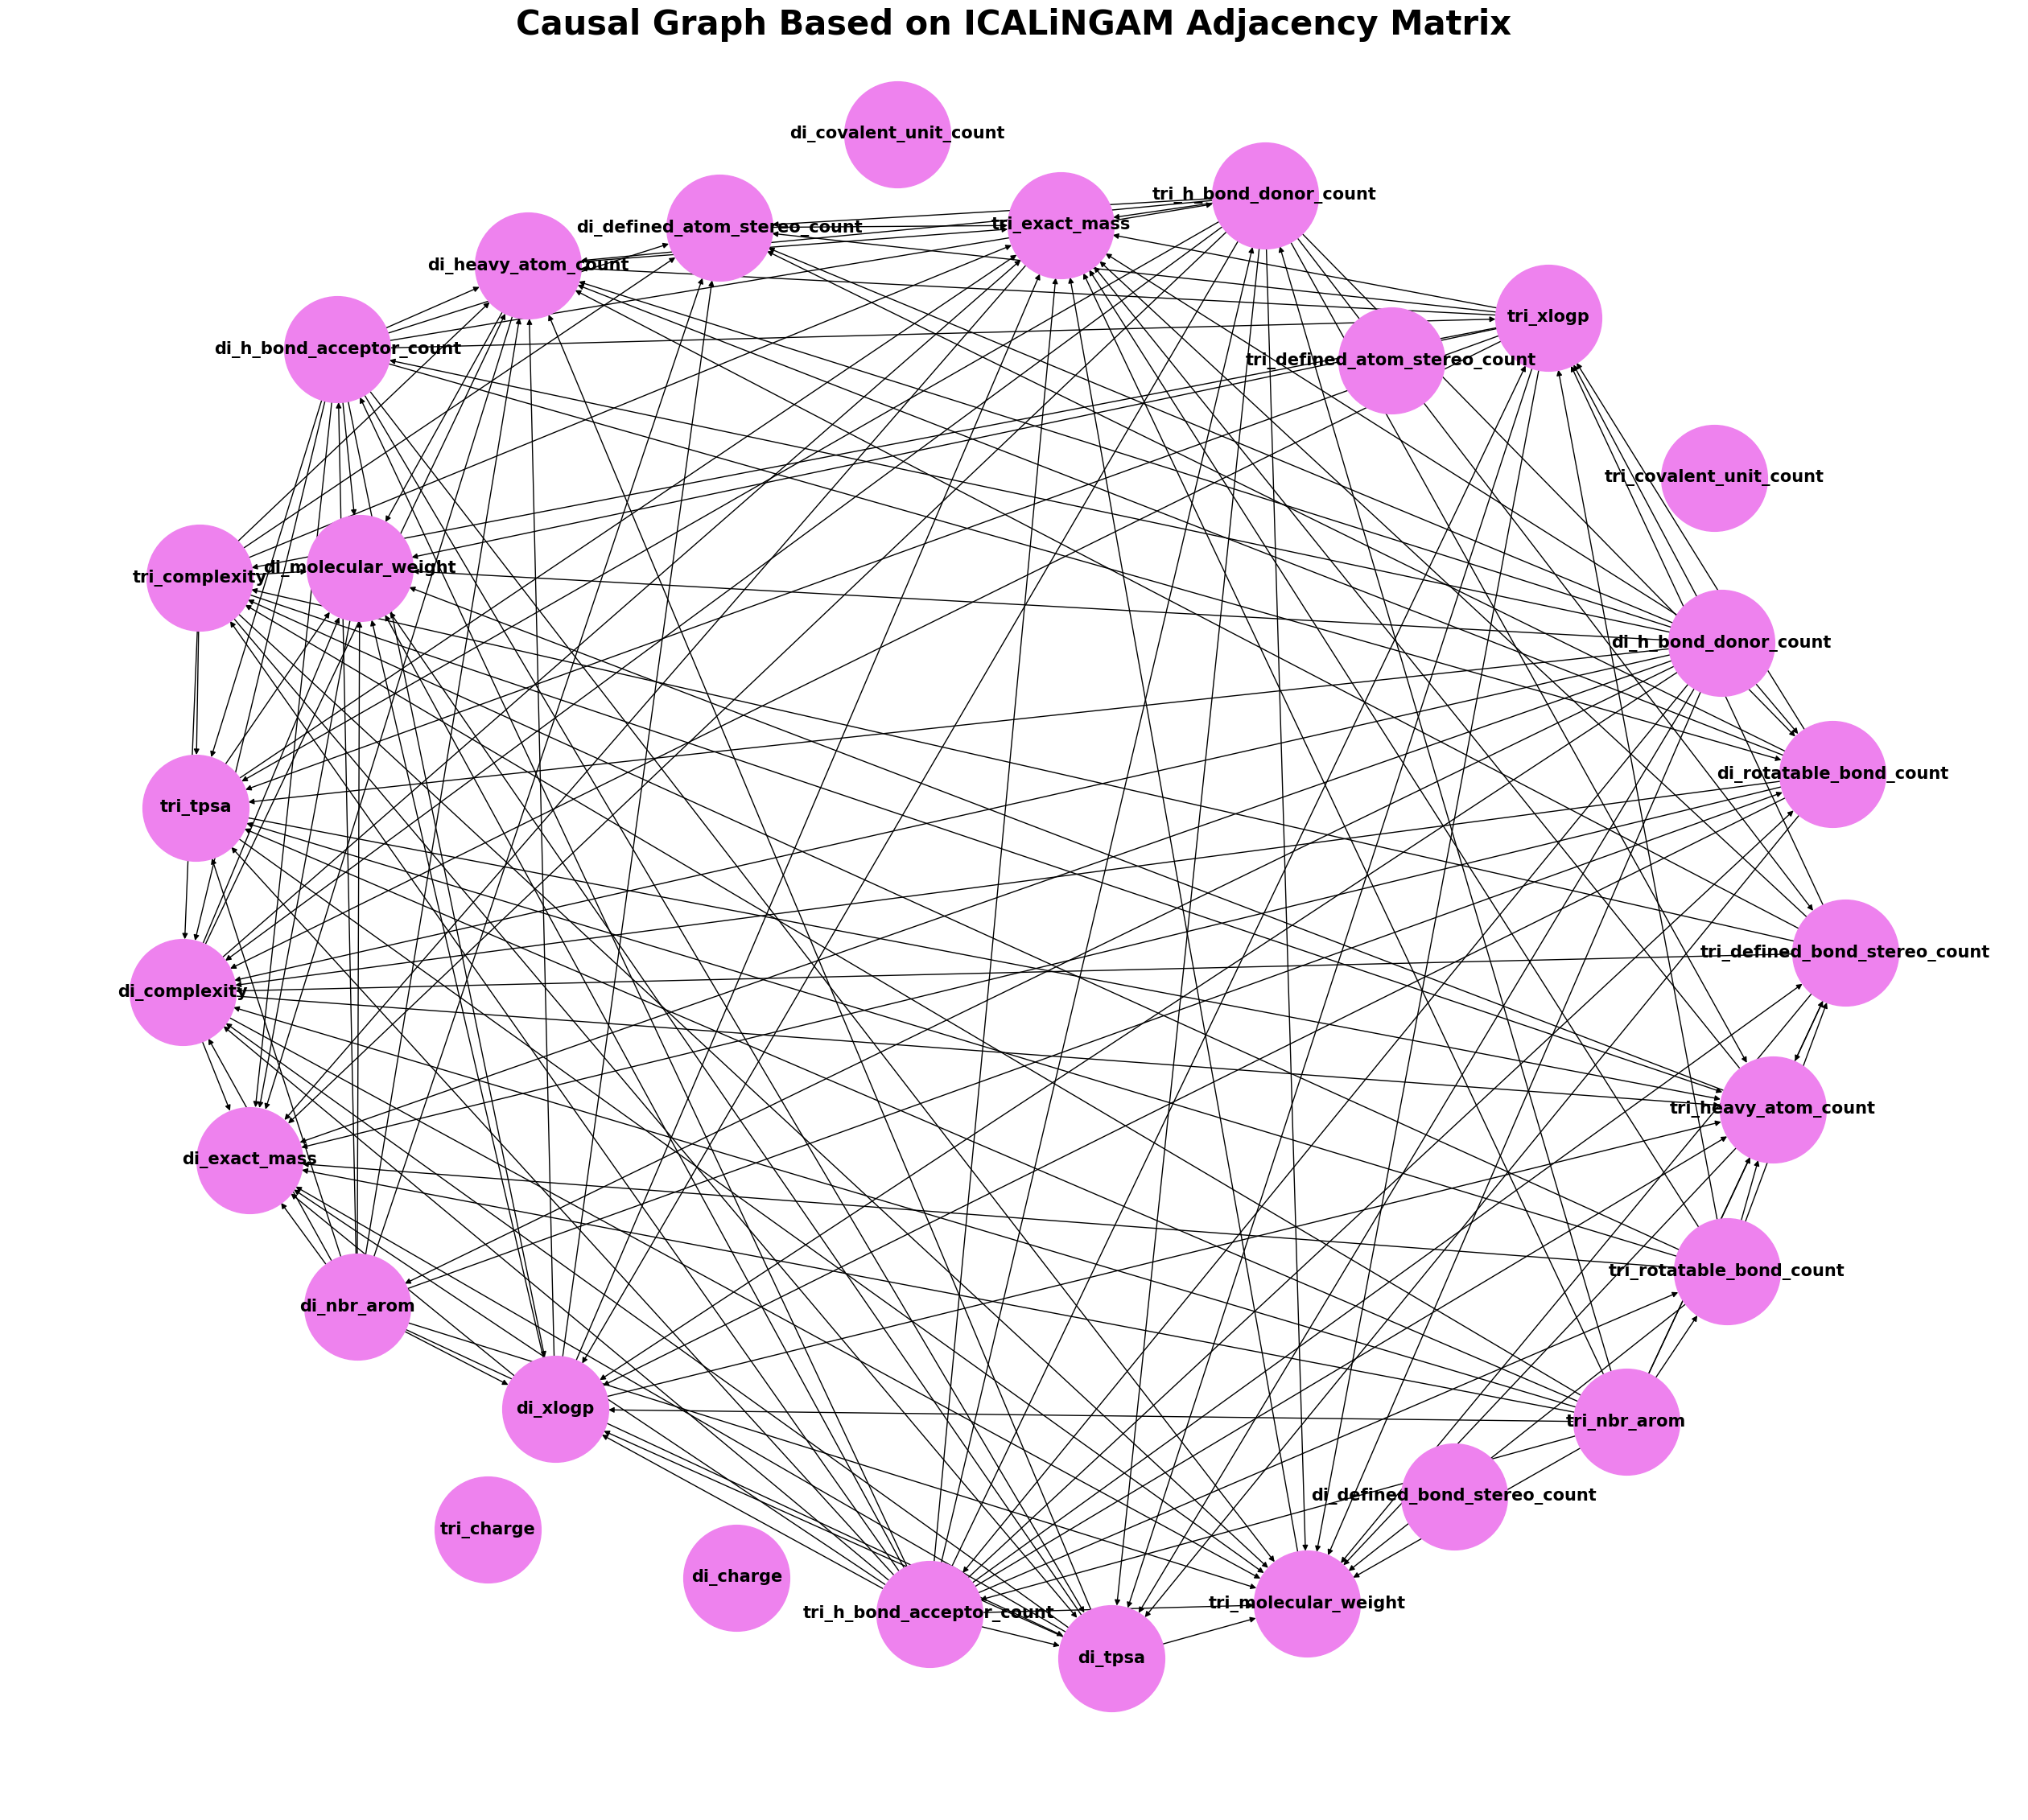

In [107]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

feature_names = column_names_all

adjacency_matrix = model.adjacency_matrix_

G = nx.DiGraph()

num_features = adjacency_matrix.shape[0]
for i in range(num_features):
    G.add_node(i, label=feature_names[i])  

for i in range(num_features):
    for j in range(num_features):
        if adjacency_matrix[i, j] != 0: 
            G.add_edge(i, j)

pos = nx.spring_layout(G, seed=50, k = 100)

labels = {i: feature_names[i] for i in range(num_features)} 
plt.figure(figsize=(25, 22))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=9000, node_color="violet", font_size=15, font_weight="bold", arrows=True)
plt.title("Causal Graph Based on ICALiNGAM Adjacency Matrix", size = 30, weight="bold")
plt.show()


# Correlation study


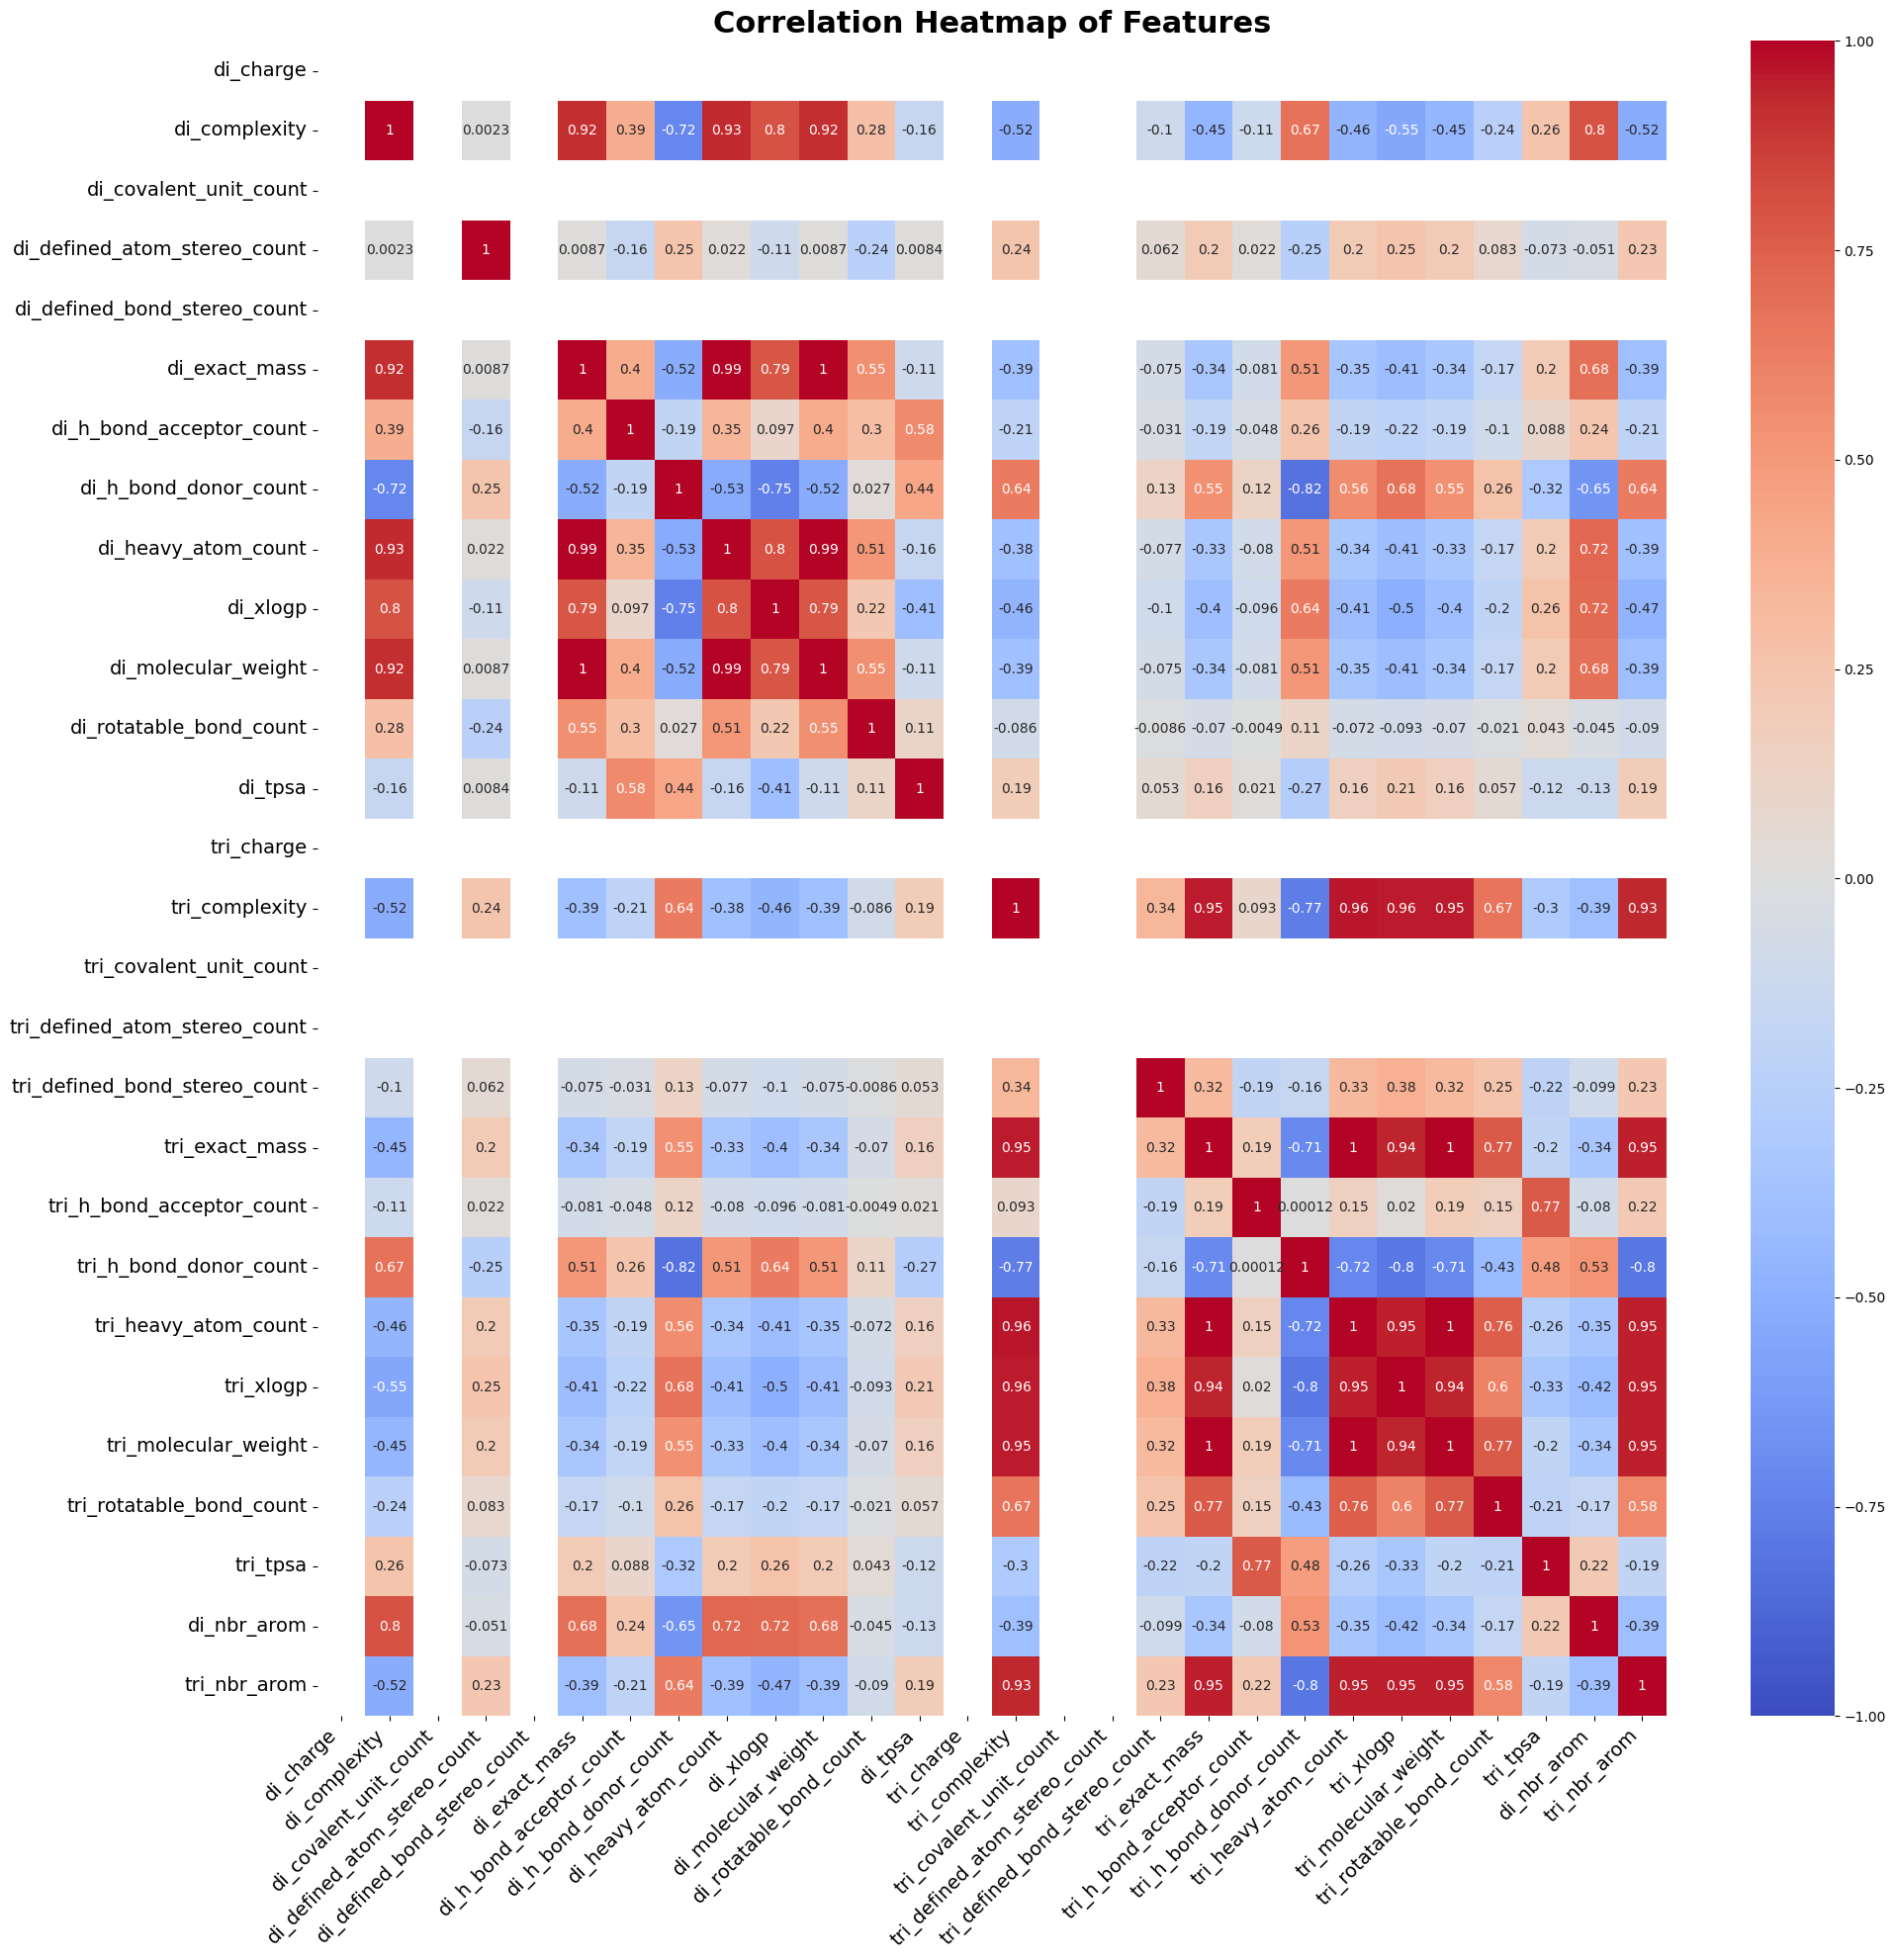

In [115]:
import seaborn as sns

correlation_matrix = data_final_all.corr()

# Plot the heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features", size = 22, weight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate and increase font size for x-axis labels
plt.yticks(rotation=0, fontsize=14) 
plt.show()


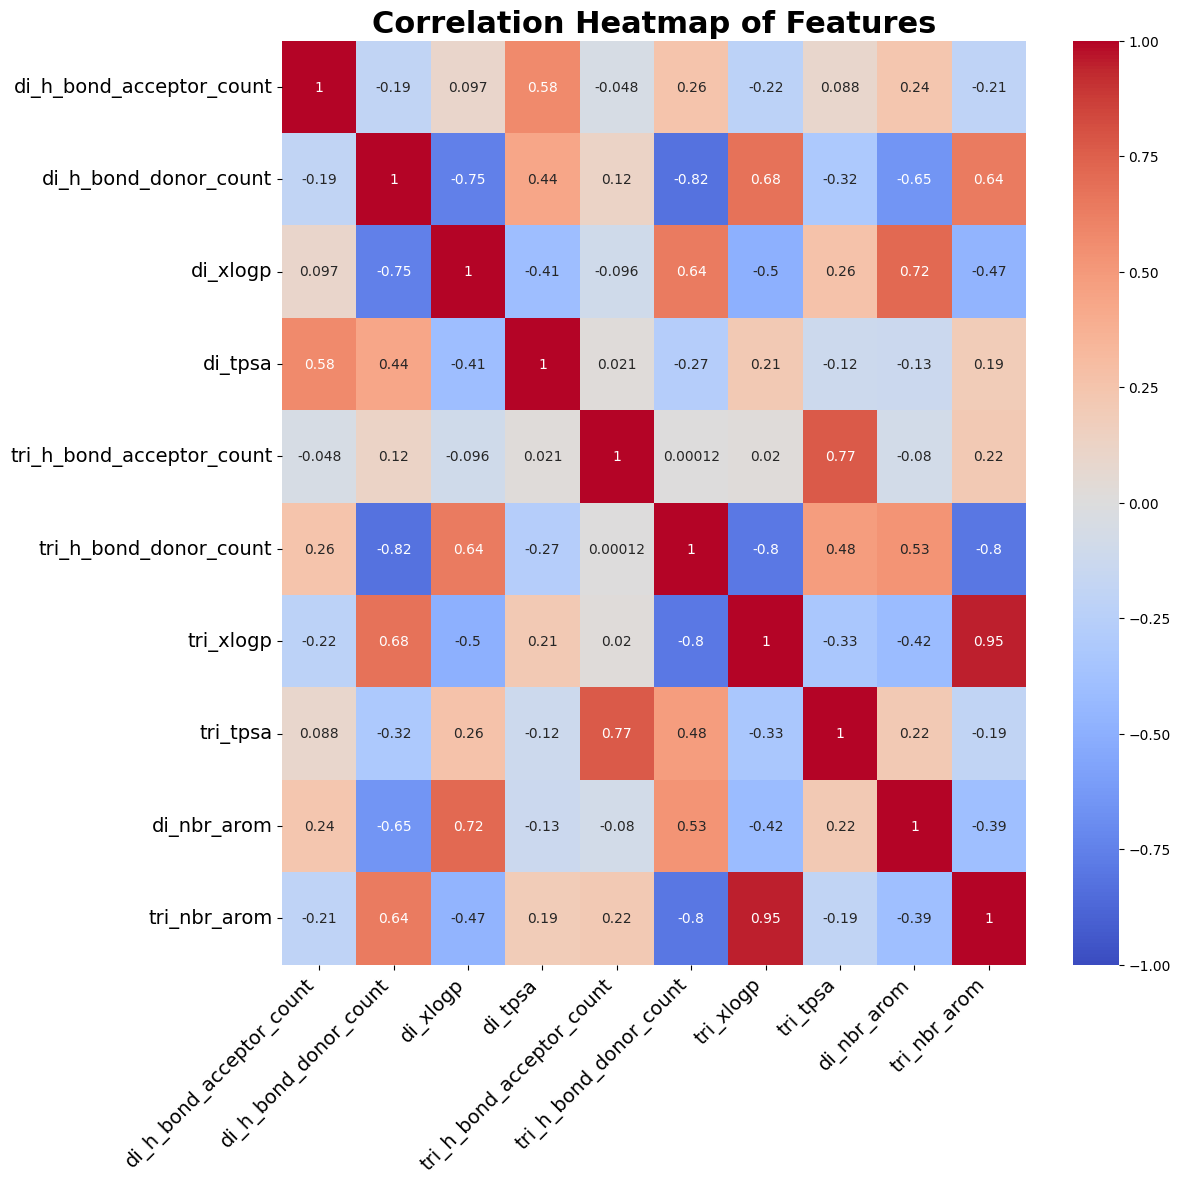

In [126]:
correlation_matrix = data_final.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features", size = 22, weight = 'bold')
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate and increase font size for x-axis labels
plt.yticks(rotation=0, fontsize=14) 
plt.show()

/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_5882/4106215161.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  interaction_matrix.loc['di_h_bond_acceptor_count', 'di_tpsa'] = 0.5  # Indirect
/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_5882/4106215161.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  interaction_matrix.loc['di_h_bond_donor_count', 'di_xlogp'] = 0.5  # Indirect
/var/folders/g8/mq_cbywj17g7tbgmmcy_bxm40000gn/T/ipykernel_5882/4106215161.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incomp

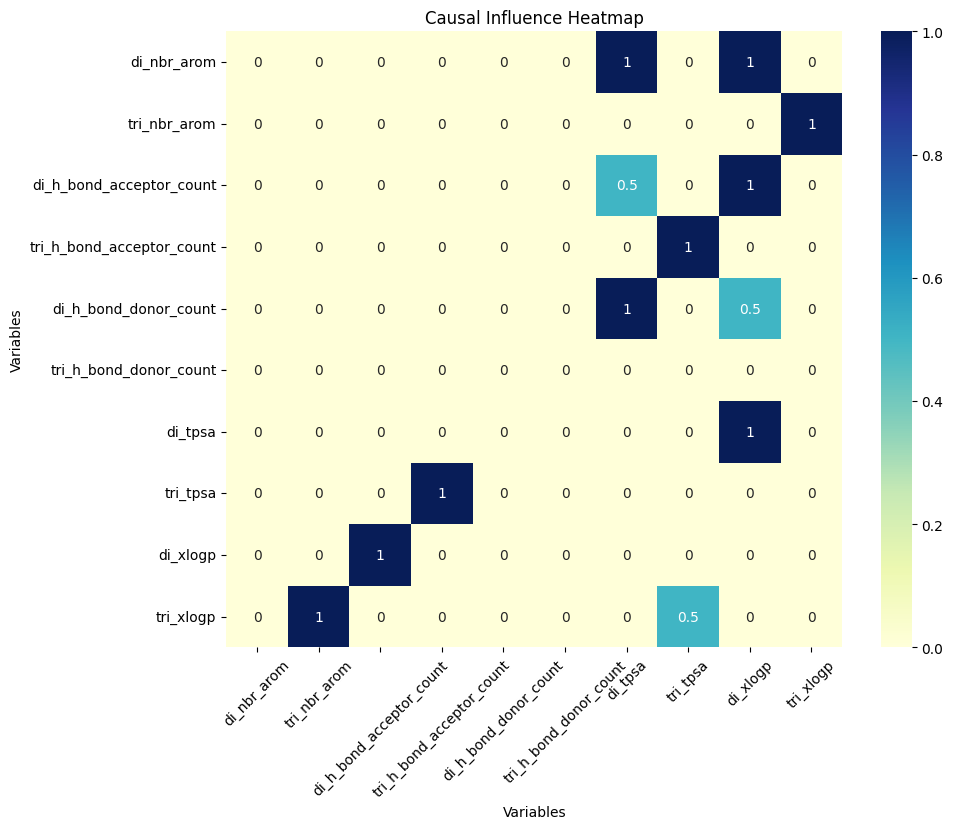

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variables = [
    'di_nbr_arom', 'tri_nbr_arom', 'di_h_bond_acceptor_count', 'tri_h_bond_acceptor_count', 
    'di_h_bond_donor_count', 'tri_h_bond_donor_count', 'di_tpsa', 'tri_tpsa', 
    'di_xlogp', 'tri_xlogp'
]

interaction_matrix = pd.DataFrame(0, index=variables, columns=variables)

interaction_matrix.loc['di_nbr_arom', 'di_xlogp'] = 1
interaction_matrix.loc['di_nbr_arom', 'di_tpsa'] = 1
interaction_matrix.loc['tri_nbr_arom', 'tri_xlogp'] = 1
interaction_matrix.loc['di_h_bond_acceptor_count', 'di_xlogp'] = 1
interaction_matrix.loc['di_h_bond_acceptor_count', 'di_tpsa'] = 0.5  
interaction_matrix.loc['tri_h_bond_acceptor_count', 'tri_tpsa'] = 1
interaction_matrix.loc['di_h_bond_donor_count', 'di_tpsa'] = 1
interaction_matrix.loc['di_h_bond_donor_count', 'di_xlogp'] = 0.5  
interaction_matrix.loc['di_tpsa', 'di_xlogp'] = 1
interaction_matrix.loc['tri_xlogp', 'tri_tpsa'] = 0.5 
interaction_matrix.loc['tri_xlogp', 'tri_nbr_arom'] = 1
interaction_matrix.loc['di_xlogp', 'di_h_bond_acceptor_count'] = 1
interaction_matrix.loc['tri_tpsa', 'tri_h_bond_acceptor_count'] = 1


plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix, annot=True, cmap="YlGnBu", cbar=True, square=True)
plt.title("Causal Influence Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
